In [1]:
from SAM_DataProcess import SAM_DataProcess
from SAM_DataVisualize import SAM_DataVisualize

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import os

In [ ]:
# establish an instance of the SAM object to visualize results from different output form (2D, 3D, stat)

In [3]:
# read in data:
DataRoot = '/data/xchen/SAM_LES_Orion'
#CaseFolder = 'RICO_RRTM_20E3'
CaseFolder = 'RICO_RRTM4PBL_1.5day'
#CaseFolder = 'RICO_RRTM_3day'
DataPath = os.path.join(DataRoot, CaseFolder)

figlocdir = 'Figs'    # this will create a local folder name "Figs" under the datapath;

SubFolders = dict()
SubFolders['2D'] = 'OUT_2D'
SubFolders['3D'] = 'OUT_3D'
SubFolders['STAT'] = 'OUT_STAT'

#caseID = 'RICO_RRTM_128x128x285_dx100m_standard_test_RRTM_20E3'
caseID = 'RICO_128x128x120_dx100m_standard_test_RRTM4PBL'
# number of processors for this run:
ncpu = 64 
file_prefix = caseID + '_{0:d}'.format(ncpu)
print(file_prefix)

filenames = dict()
filenames['2D'] = file_prefix + '.2Dbin_1.nc'
#filenames['2D'] = file_prefix + '.2Dcom_1.nc'
filenames['STAT'] = caseID + '.nc'
filenames['3D'] = file_prefix + '.nc'



# now start to read in data:
for key, fn in filenames.items():
    absFN = os.path.join(DataPath, SubFolders[key], fn)
    print('reading: ' + absFN)
    # construct dataname dynamically:
    exec('ds_' + key + '= xr.open_dataset(absFN)')
        
        

RICO_128x128x120_dx100m_standard_test_RRTM4PBL_64
reading: /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/OUT_2D/RICO_128x128x120_dx100m_standard_test_RRTM4PBL_64.2Dbin_1.nc
reading: /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/OUT_STAT/RICO_128x128x120_dx100m_standard_test_RRTM4PBL.nc
reading: /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/OUT_3D/RICO_128x128x120_dx100m_standard_test_RRTM4PBL_64.nc


In [4]:
# when the file is OUT_2D, add add total water path to the data
ds_2D['TWP'] = ds_2D.CWP + ds_2D.IWP + ds_2D.PW 
ds_2D['logCWP'] = np.log10(ds_2D.CWP)

# reset attribute for logCWP:
ds_2D['logCWP'] = ds_2D.logCWP.assign_attrs(long_name='log10 Cloud Water Path')

/home/xchen/.conda/envs/eurec4a/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [5]:
out_stat = SAM_DataVisualize()
out_2D = SAM_DataVisualize()

In [6]:
out_stat.var = ['CLD','PRECIP', 'RADQR', 'THETAV','QV','TVFLUX', 'U','V', 'TKE']
out_stat.path = DataPath
out_stat.caseID = CaseFolder  #'RICO_RRTM4PBL_1.5day'
out_stat.nc = ds_STAT

In [7]:
out_2D.path = DataPath
out_2D.caseID = CaseFolder
out_2D.nc = ds_2D

In [8]:
out_stat.nc.z

<xarray.DataArray 'z' (z: 100)>
array([  20.,   60.,  100.,  140.,  180.,  220.,  260.,  300.,  340.,  380.,
        420.,  460.,  500.,  540.,  580.,  620.,  660.,  700.,  740.,  780.,
        820.,  860.,  900.,  940.,  980., 1020., 1060., 1100., 1140., 1180.,
       1220., 1260., 1300., 1340., 1380., 1420., 1460., 1500., 1540., 1580.,
       1620., 1660., 1700., 1740., 1780., 1820., 1860., 1900., 1940., 1980.,
       2020., 2060., 2100., 2140., 2180., 2220., 2260., 2300., 2340., 2380.,
       2420., 2460., 2500., 2540., 2580., 2620., 2660., 2700., 2740., 2780.,
       2820., 2860., 2900., 2940., 2980., 3020., 3060., 3100., 3140., 3180.,
       3220., 3260., 3300., 3340., 3380., 3420., 3460., 3500., 3540., 3580.,
       3620., 3660., 3700., 3740., 3780., 3820., 3860., 3900., 3940., 3980.],
      dtype=float32)
Coordinates:
  * z        (z) float32 20.0 60.0 100.0 140.0 ... 3.9e+03 3.94e+03 3.98e+03
Attributes:
    units:      m
    long_name:  height

plotting standard variables
saving figure as RICO_RRTM4PBL_1.5day_domain_mean_evolution_of_standard_variables.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


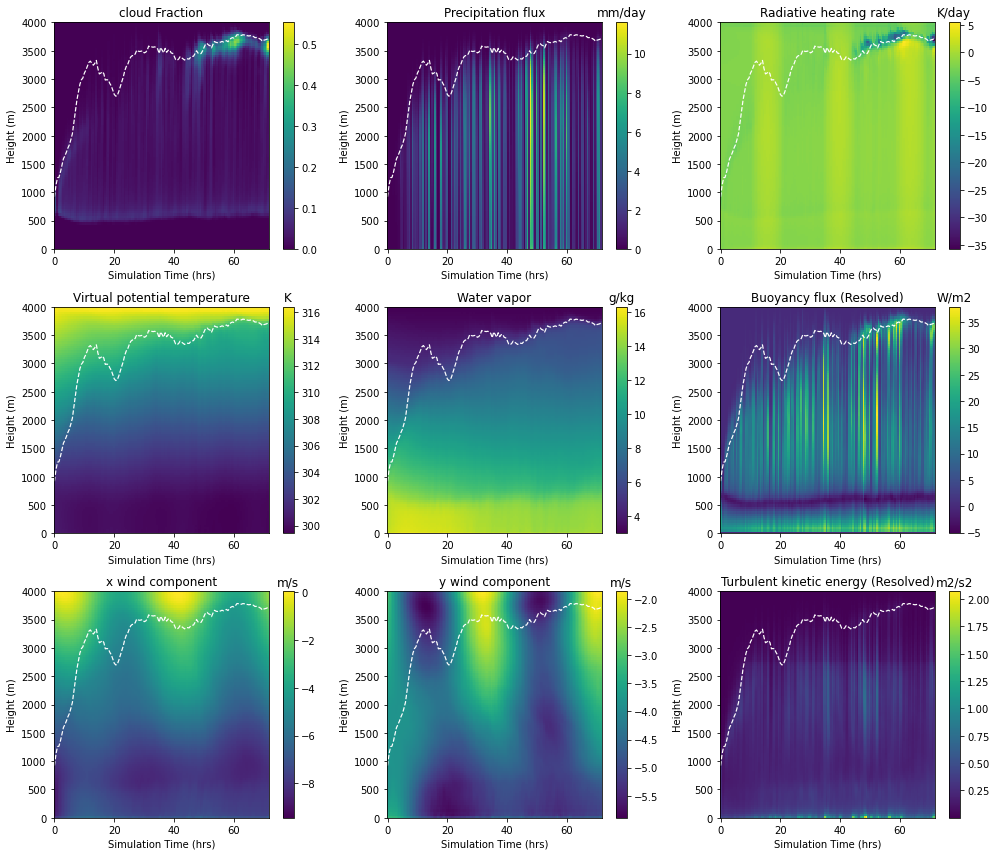

In [9]:
# 1. plot domain mean evolution:
# add an argument to specify the vertical limits:
out_stat.domain_mean_evolution(figsize=(14,12), zmax=4000, svfig = True, svdir=figlocdir)

In [10]:
time=(out_stat.nc.time-out_stat.nc.time[0])*24
np.where(abs(time-72) == np.min(abs(time-72)))[0][0]

143

saving figure as RICO_RRTM4PBL_1.5day_domain_mean_vertical_profiles_of_key_parameters.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


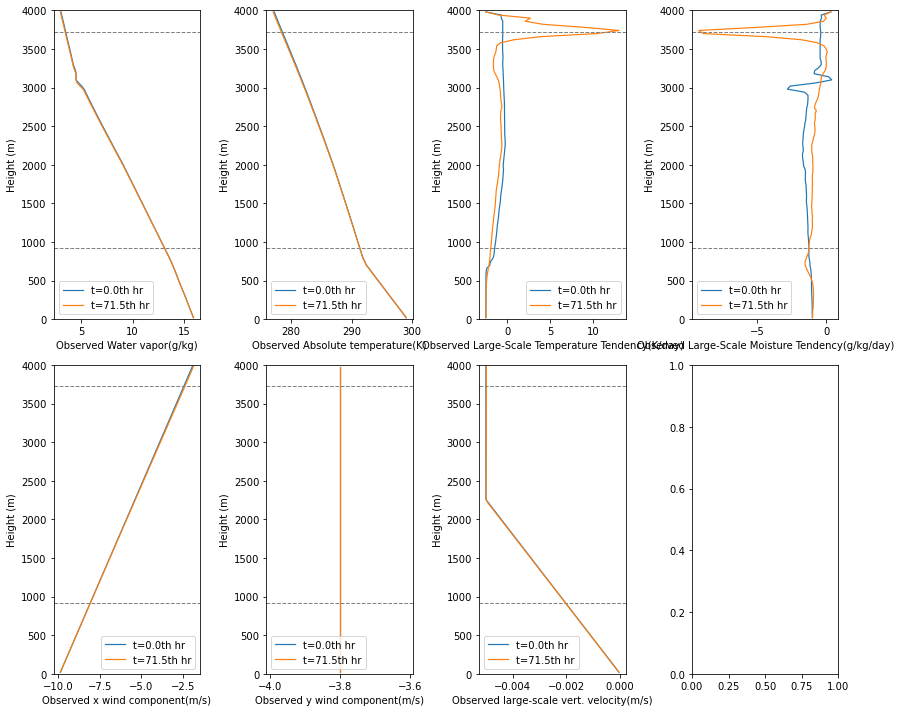

In [11]:
# 2. plot domain mean vertical profile at selected simulation time (initial and the end of simulation)
# somehow the data structure is not consistent with each other.

init_key_vars = ['QVOBS','TABSOBS','TTEND','QTEND','UOBS','VOBS','WOBS']
out_stat.domain_mean_profiles(var_list = init_key_vars, simThr = [0, 72],ncol=4, figsize=(12,10), svfig=True, 
                         svdir=figlocdir)


saving figure as RICO_RRTM4PBL_1.5day_spatial_evolution_of_PW_CWP_TB.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


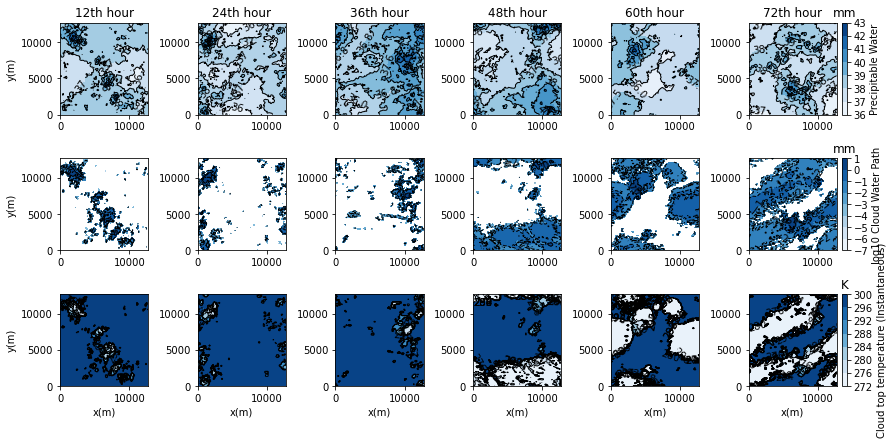

In [15]:
## ------- out_2D ------------ ##
# plot domain evolution of vertically integrated (or 2D) quantities:
var_list = ['PW','logCWP', 'TB']
ts = np.arange(12,80,12)
out_2D.spatial_map(var_list = var_list, zlev=0, ColIntFlag=True, simThr=ts, figsize=(12.5,6), 
                 colormap=cm.Blues,svfig=True, svdir=figlocdir, figname_suff='PW_CWP_TB')

In [12]:
ts = np.arange(12,80,12)
ts

array([12, 24, 36, 48, 60, 72])

In [ ]:
# try fixing the range of the colorbar to be equal in positive and negative range.
var_list = ['USFC','VSFC', 'U850','V850']
out_2D.spatial_map(var_list = var_list, zlev=0, ColIntFlag=True, simThr=[12,24,36,48], figsize=(15,15), 
                 colormap=cm.RdBu,svfig=True, svdir=figlocdir, figname_suff='SurfaceWind_850mbWind')

In [16]:
# -- Block averaging and quartile sorted variables:

out_2D_datap = SAM_DataProcess()
out_2D_datap.path = out_2D.path
out_2D_datap.caseID = out_2D.caseID
out_2D_datap.nc = ds_2D

# call into the block averaging and quartile sorted function/method
nblock=64 
ds_blockave_obj = out_2D_datap.block_averaging

In [17]:
ds_blockave=ds_blockave_obj()

In [18]:
TWP_bins=np.percentile(ds_blockave.TWP, np.linspace(0,100,5))
TWP_bin_labels = ['Q1','Q2','Q3','Q4']
out_2D_datap.nc = ds_blockave
ds_qrtave = out_2D_datap.TWPsorted_quartile_statistics(TWP_bins=TWP_bins, TWP_bin_labels = TWP_bin_labels)

100%|██████████████████████████████████████████████████████████████████████| 10/10 [02:29<00:00, 14.91s/it]


In [19]:
filename = out_2D_datap.caseID + '_quartile_mean_ds_for_testing_updated_3days.nc'
ncexist_flag = os.path.exists(filename)
#

In [20]:
if ncexist_flag:
    ds_qrtave = xr.open_dataset(filename)
else:
    ds_qrtave.to_netcdf(filename)

In [ ]:
ds_2D

In [21]:
# temporary solution:
for vn in ['PW','CWP','ZC']:
    ds_qrtave[vn] = ds_qrtave[vn].assign_attrs(long_name=ds_2D[vn].long_name)
    ds_qrtave[vn] = ds_qrtave[vn].assign_attrs(units=ds_2D[vn].units)


In [22]:
ds_qrtave['time'] = ds_qrtave['time'].assign_attrs(long_name=ds_2D.time.long_name)
ds_qrtave['time'] = ds_qrtave['time'].assign_attrs(units=ds_2D.time.units)

In [23]:
# establish a plotting class:
qrtds = SAM_DataVisualize()

# initialize data
qrtds.nc = ds_qrtave
qrtds.var = ['PW','CWP','ZC']
qrtds.path = out_2D_datap.path
qrtds.caseID = out_2D_datap.caseID

In [24]:
#varname=None, time_smoothing=False, time_smoothing_window=None,
dt = (ds_2D.time[1]-ds_2D.time[0])*24
nt = int(2/dt)
print('smoothing window = {0:.1f} hrs'.format(2))
print('smoothing over {0:.0f} points'.format(nt))
#qrtds.quartile_evolution(varname=None)


smoothing window = 2.0 hrs
smoothing over 11 points


No handles with labels found to put in legend.
No handles with labels found to put in legend.


plotting standard variables
saving figure as RICO_RRTM4PBL_1.5day_TWP_quartile_mean_evolution_of_standard_variables.jpg
to /data/xchen/SAM_LES_Orion/RICO_RRTM4PBL_1.5day/Figs


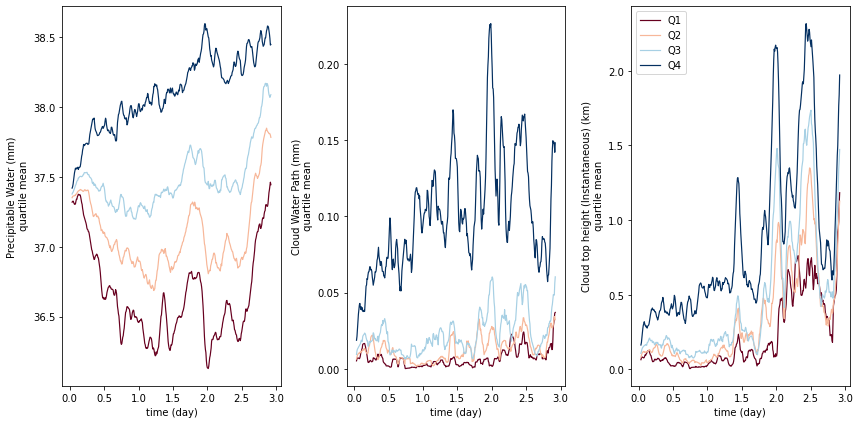

In [25]:
qrtds.quartile_evolution(tsm=True, tsm_window=nt, figsize=(12,6), svfig=True, svdir = figlocdir)

In [ ]:
# 3D data?